# LAB 5: Higgs Classification

For this lab, we look at an inclusive search for the Standard Model's Higgs boson in high energy proton-proton collissions at $\sqrt{s} = 13 TEv$ at the Large Hadron Collider using simulated data. Higgs bosons are produced with large traverse momentum $(pT)$ and decay to a bottom quark - antiquark pair. We can use Calorimeters to reconstruct Higgs candinates as large-radius jets. Large QCD background containmination prevents us from achieving $5\sigma$ obervation of this Higgs channel. We'll be using a set of training datasets to optimize events selctreion in order to better the discovery sensitivity.

### Jets
Jets are collections of particles that go toward the same direction in the detector. They come form Bremsstrahlung(showering) and fragmentation of primordial hard quark or gluon. Jets must be defined from experimental observables, namely the 4-momenta of the observed particles in the event. One of the properties of jets is that they allow for calculation to be done at the parton level(quarks and gluons) to agree with a measurement done at the particle level(pions and protons). Another feature is that a jet algorithm should be local in the detector (not pulling in particles from far away). This reduces systematic uncertainty of jet measurements. This simplest way to define a jet is to draw a cone of size $R=\sqrt{(Δη)^2+Δ(ϕ)^2}$ around some particle and include everything in that cone as the jet.

In [17]:
# import library
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

# open the file of interest, and use pickle loading
infile = open ("../higgs_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

#### Our Data has 14 Features, below is a desciption of these features:

&nbsp; Jet Kinematics:
<br > &emsp; &emsp; 'pt': transverse momentum
<br > &emsp; &emsp; 'eta': psedorapidty, angle of particle in z-y plane
<br > &emsp; &emsp; 'phi': azimuthal angle
<br > &emsp; &emsp; 'mass': invariant mass

&nbsp; Energy Correlation Functions:
<br > &emsp; &emsp; 'ee2': 2 point ratio
<br > &emsp; &emsp; 'ee3': 3 point ratio
<br > &emsp; &emsp; 'd2': ee3/ee2

&nbsp; Cluster Sequence:
<br > &emsp; &emsp; 'angularity': Orientation of one feature to another at some shared angle

&nbsp; $K_{t}\Delta_{R}$:
<br > &emsp; &emsp; 'KtDeltaR': Delta R of two subjects within large-R jet

&nbsp; Subjettiness:
<br > &emsp; &emsp; 't1': 1-subjettiness
<br > &emsp; &emsp; 't2': 2-subjettiness
<br > &emsp; &emsp; 't3': 3-subjettiness
<br > &emsp; &emsp; 't21': 21-subjettiness
<br > &emsp; &emsp; 't32': 32-subjettiness










We'll be looking at data in the low range for the transverse momenta

In [18]:
# signal dataset
file1 = open ("../higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(file1)

# background dataset
file2 = open ("../qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(file2)

In [19]:
print(higgs_data)
print('--------------------------------------------------------------------------')
print(qcd_data)

                pt       eta       phi        mass       ee2       ee3  \
0      1130.533498  0.075569 -2.535979  126.390705  0.050194  0.000198   
1      1040.287356 -0.917809 -0.511002  125.735472  0.068068  0.000259   
2      1042.978241  0.431547 -1.287136  125.946948  0.054627  0.000189   
3      1173.988224 -1.000457 -0.567291  133.475055  0.057164  0.000211   
4      1158.143085 -0.205305  2.778395  135.047319  0.028222  0.000114   
...            ...       ...       ...         ...       ...       ...   
99995  1081.930827 -0.292886 -0.066601  128.449819  0.062010  0.000188   
99996  1114.171856 -0.071148 -0.518420  128.133729  0.060090  0.000269   
99997  1066.593095  0.776745 -2.067399  125.351507  0.063063  0.000260   
99998  1043.746312 -0.403642  1.761954  125.477362  0.065217  0.000204   
99999  1167.639118  0.372814 -0.428271  123.796492  0.047734  0.000230   

             d2  angularity        t1        t2        t3       t21       t32  \
0      1.565921    0.000846  0

Now that we've loaded in both the signal and background datasets, let's look at each of the 14 features

### Transverse Momentum

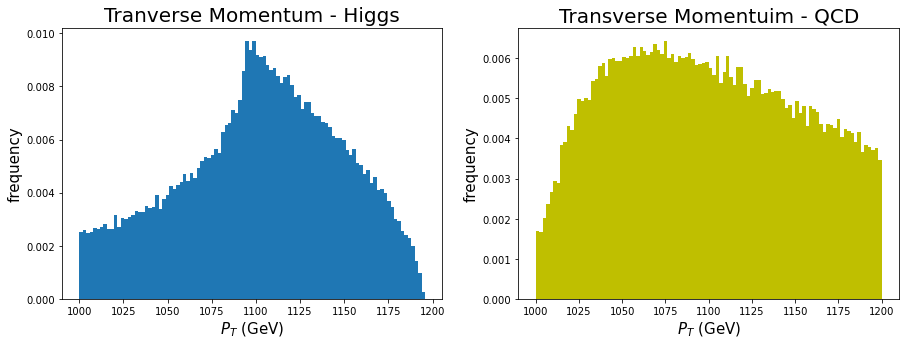

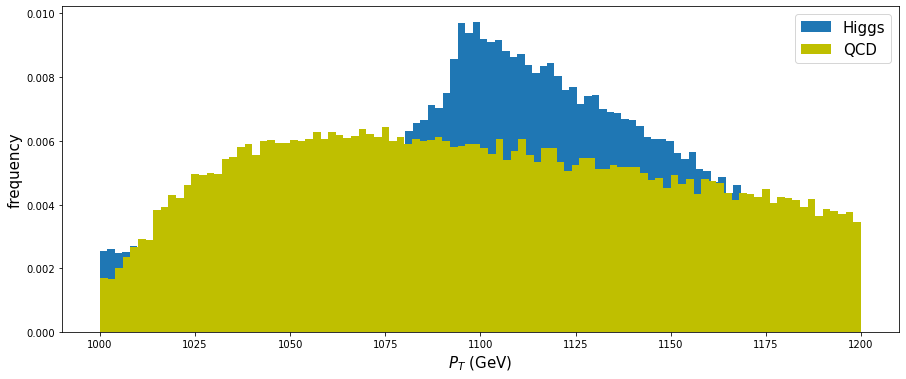

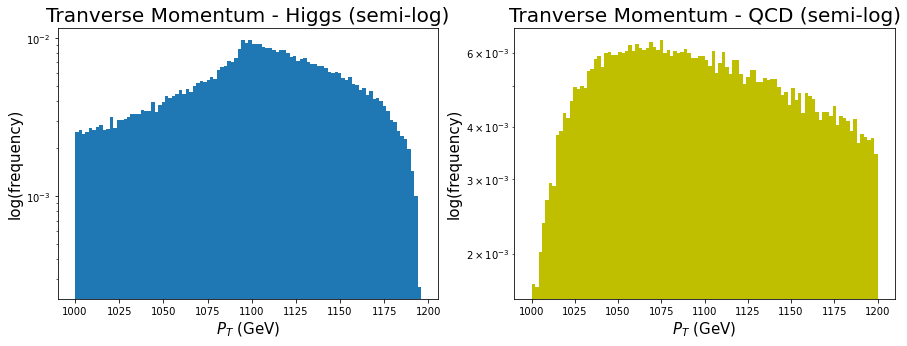

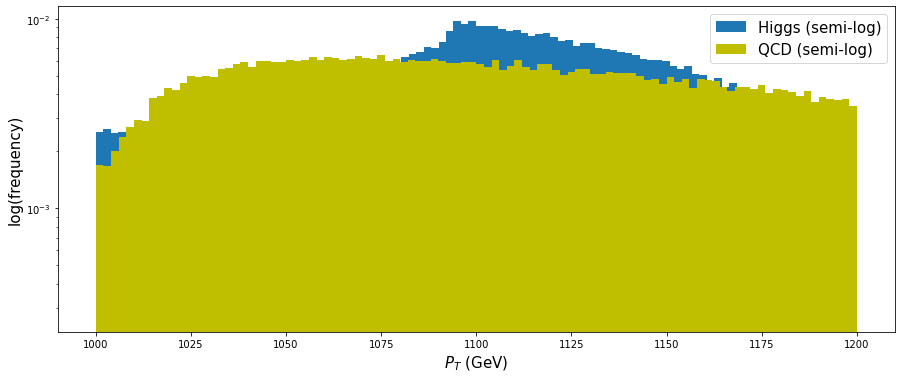

In [56]:
l1 = 'Tranverse Momentum - Higgs'
l2 = 'Transverse Momentuim - QCD'
l3 = 'Tranverse Momentum - Higgs (semi-log)'
l4 = 'Tranverse Momentum - QCD (semi-log)'

H_pt = higgs_data['pt'][:]
Q_pt = qcd_data['pt'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(H_pt,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel("$P_T$ (GeV)",fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(Q_pt,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel("$P_T$ (GeV)",fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(H_pt,density=True, bins=100,label="Higgs")
ax.hist(Q_pt,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel("$P_T$ (GeV)",fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);


H_pt = higgs_data['pt'][:]
Q_pt = qcd_data['pt'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(H_pt,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel("$P_T$ (GeV)",fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(Q_pt,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel("$P_T$ (GeV)",fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(H_pt,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(Q_pt,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel("$P_T$ (GeV)",fontsize=15)
ax.set_ylabel("log(frequency)",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Pseudorapidity (eta)

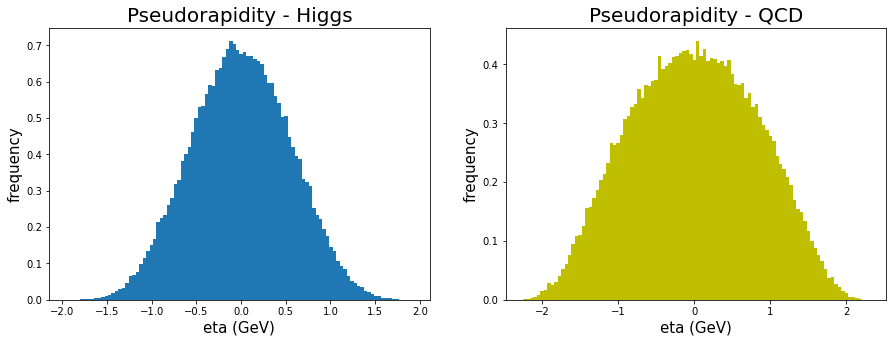

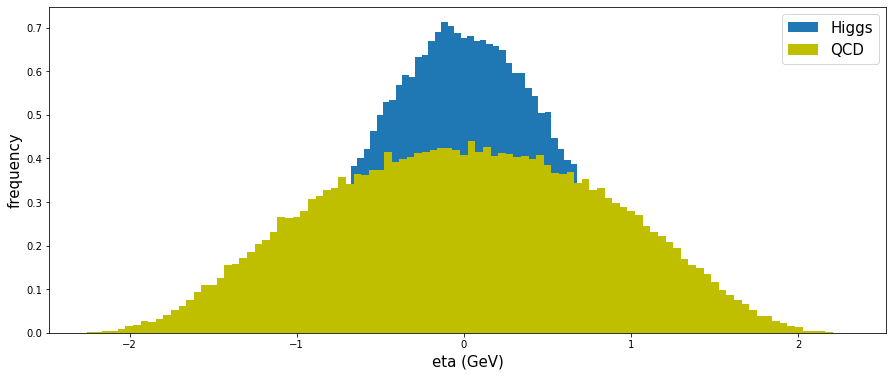

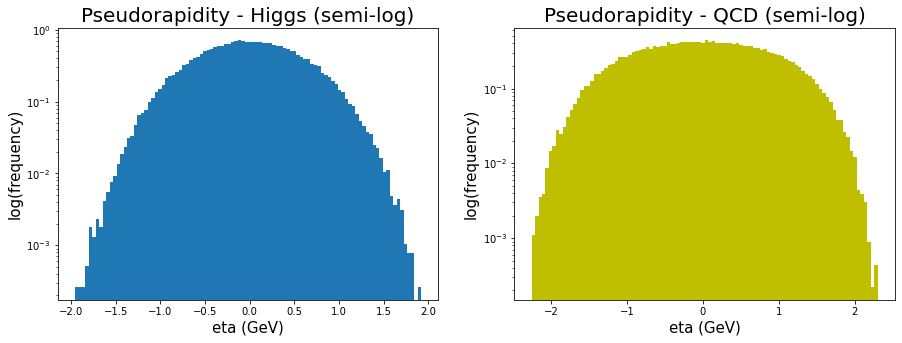

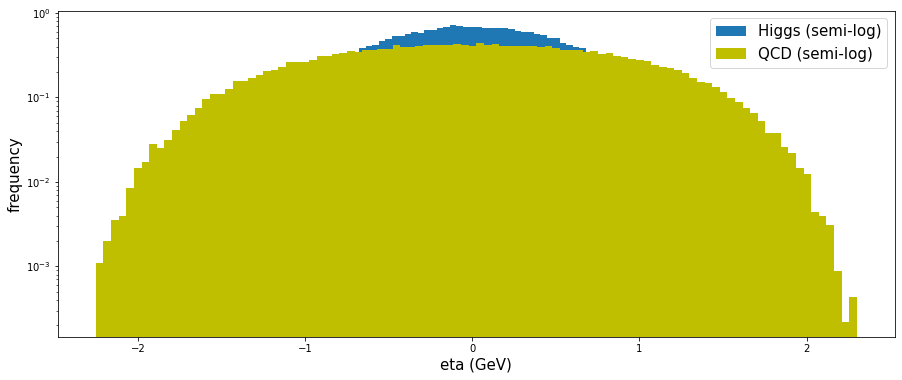

In [63]:
l1 = 'Pseudorapidity - Higgs'
l2 = 'Pseudorapidity - QCD'
l3 = 'Pseudorapidity - Higgs (semi-log)'
l4 = 'Pseudorapidity - QCD (semi-log)'
var = 'eta (GeV)'
higgs = higgs_data['eta'][:]
qcd = qcd_data['eta'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Azimuthal Angle

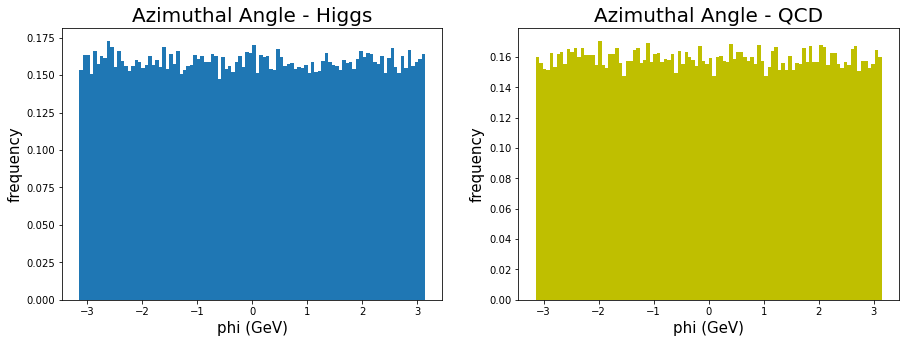

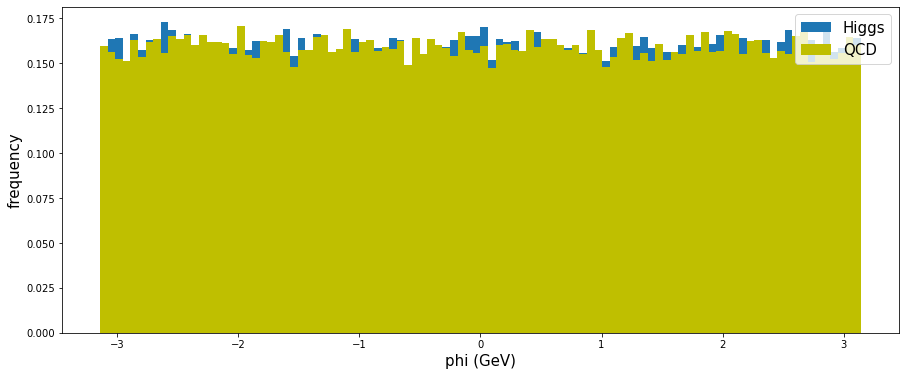

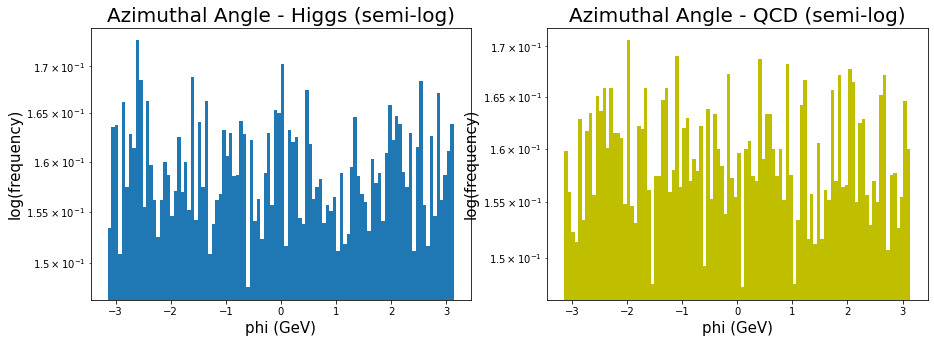

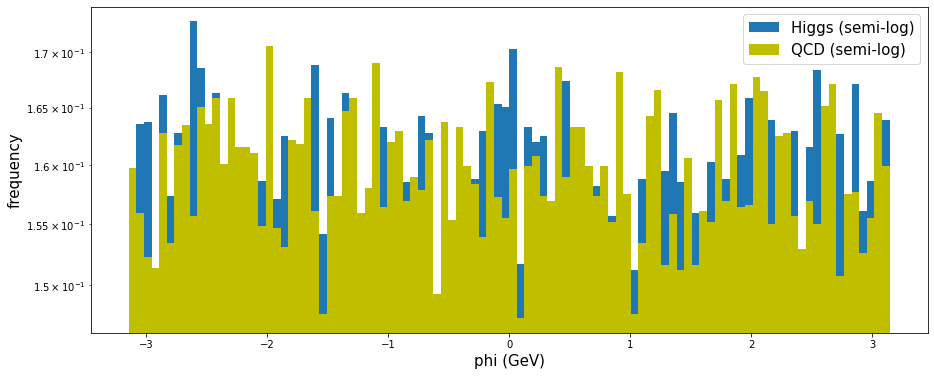

In [60]:
l1 = 'Azimuthal Angle - Higgs'
l2 = 'Azimuthal Angle - QCD'
l3 = 'Azimuthal Angle - Higgs (semi-log)'
l4 = 'Azimuthal Angle - QCD (semi-log)'
var = 'phi (GeV)'
higgs = higgs_data['phi'][:]
qcd = qcd_data['phi'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Invariant Mass

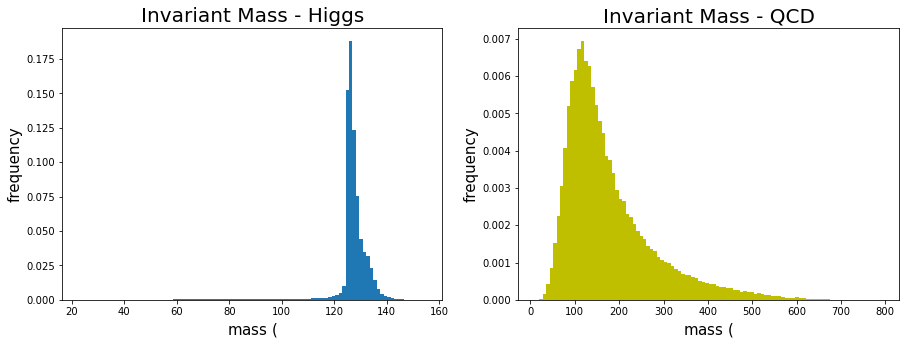

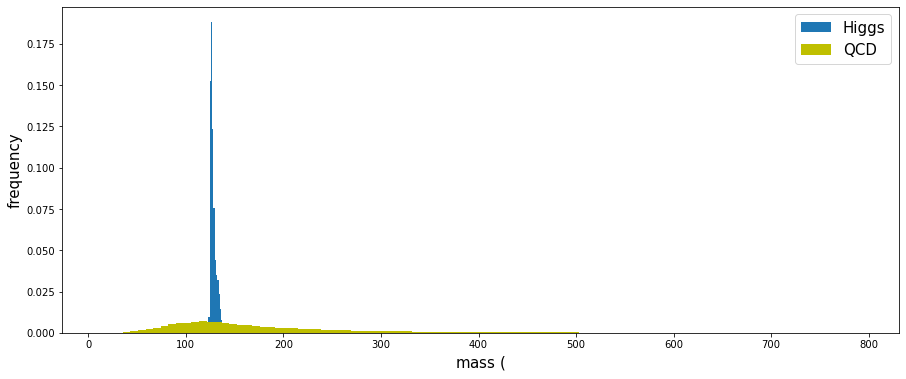

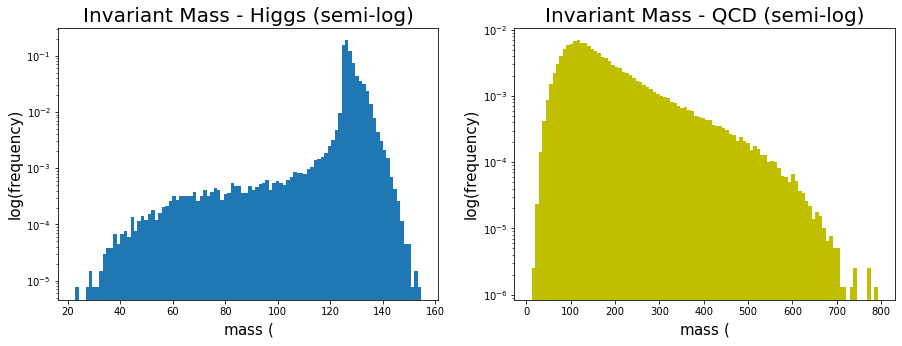

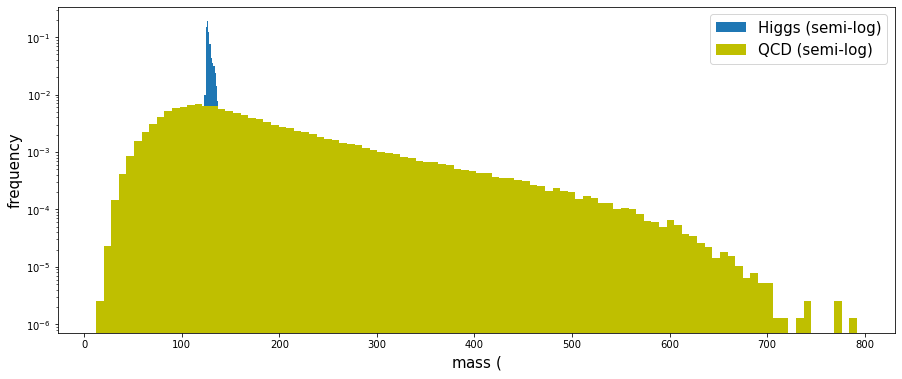

In [62]:
l1 = 'Invariant Mass - Higgs'
l2 = 'Invariant Mass - QCD'
l3 = 'Invariant Mass - Higgs (semi-log)'
l4 = 'Invariant Mass - QCD (semi-log)'
var = 'mass $(\frac{GeV}{c^2})$'
higgs = higgs_data['mass'][:]
qcd = qcd_data['mass'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Energy Correlation Functions

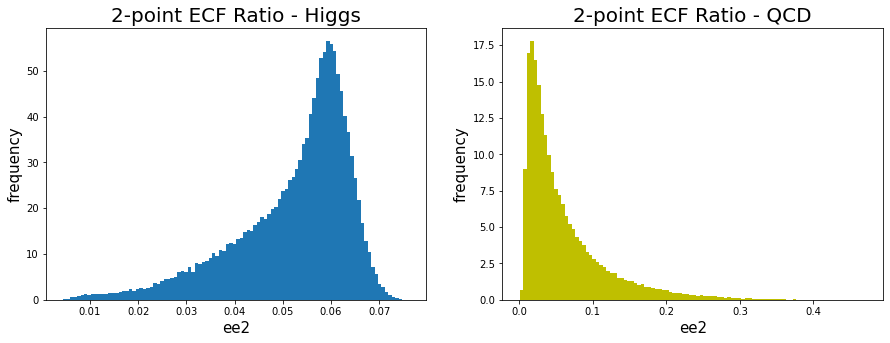

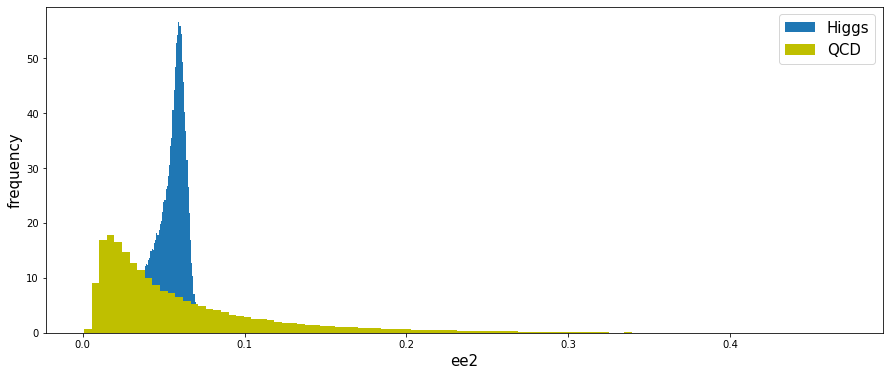

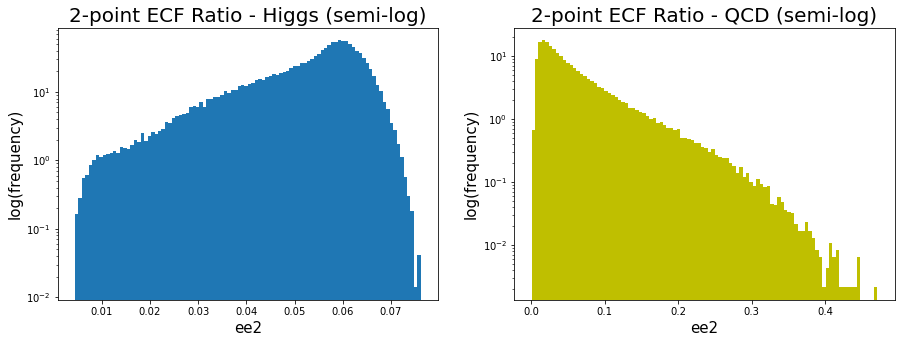

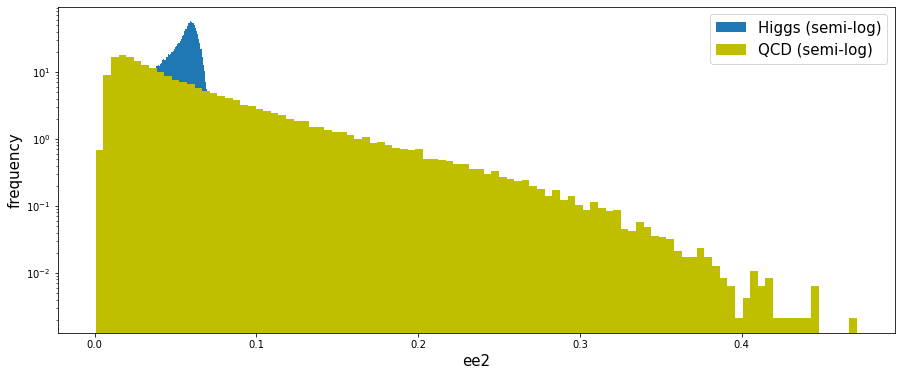

In [65]:
l1 = '2-point ECF Ratio - Higgs'
l2 = '2-point ECF Ratio - QCD'
l3 = '2-point ECF Ratio - Higgs (semi-log)'
l4 = '2-point ECF Ratio - QCD (semi-log)'
var = 'ee2'
higgs = higgs_data['ee2'][:]
qcd = qcd_data['ee2'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

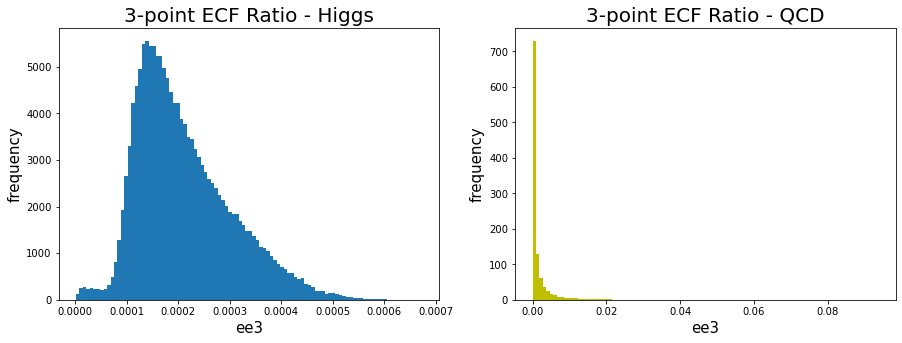

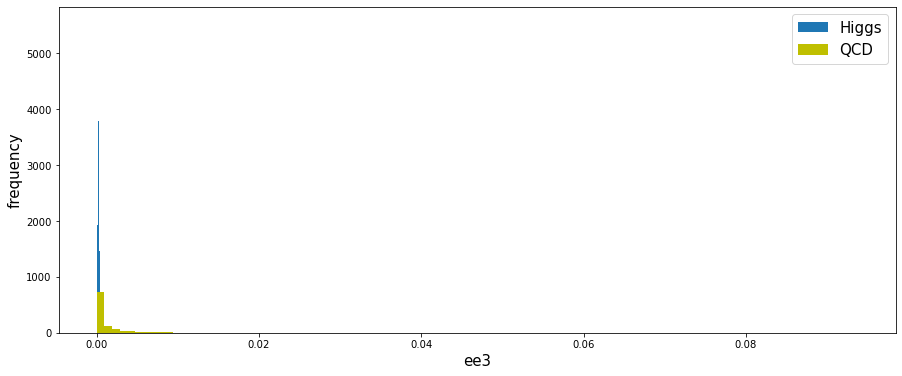

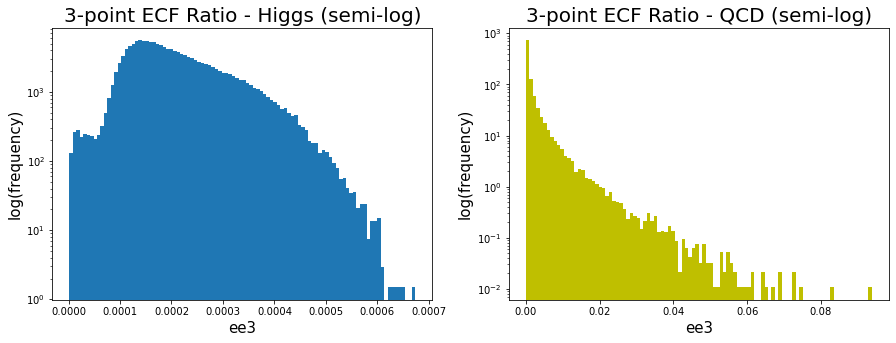

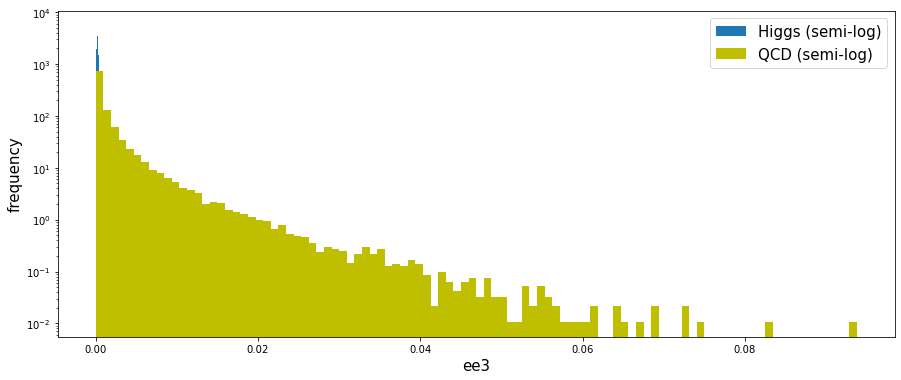

In [66]:
l1 = '3-point ECF Ratio - Higgs'
l2 = '3-point ECF Ratio - QCD'
l3 = '3-point ECF Ratio - Higgs (semi-log)'
l4 = '3-point ECF Ratio - QCD (semi-log)'
var = 'ee3'
higgs = higgs_data['ee3'][:]
qcd = qcd_data['ee3'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

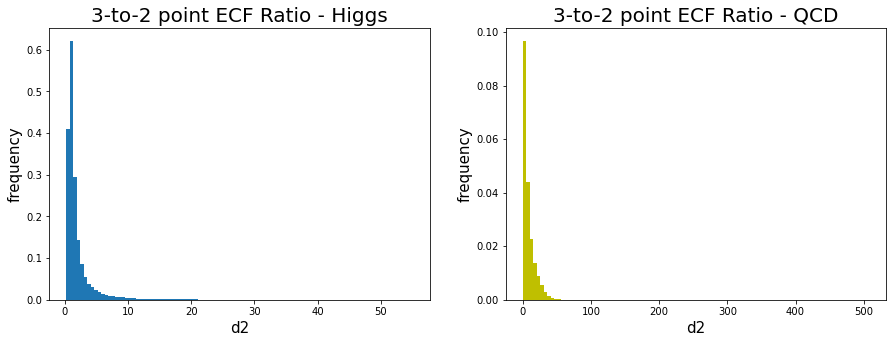

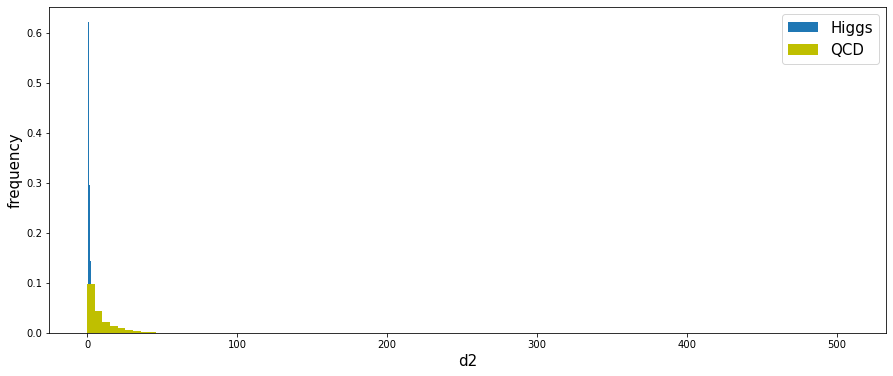

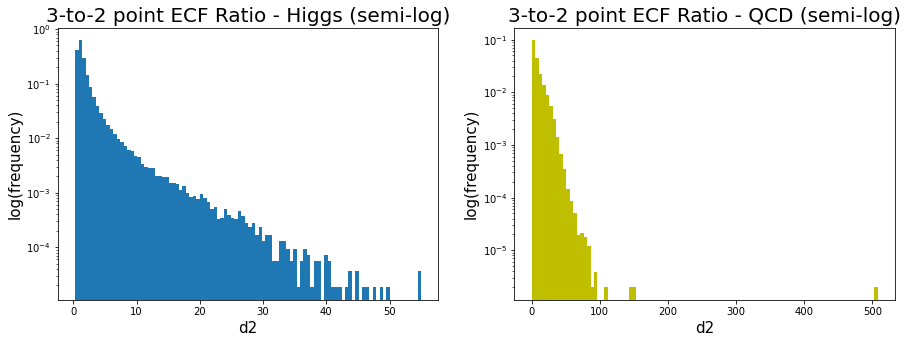

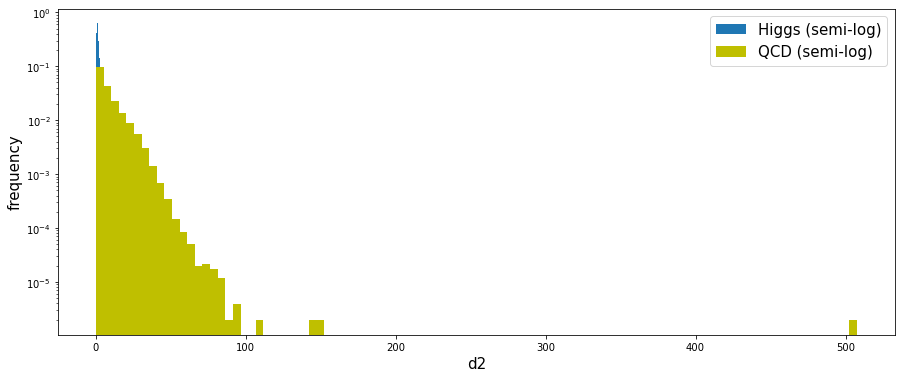

In [67]:
l1 = '3-to-2 point ECF Ratio - Higgs'
l2 = '3-to-2 point ECF Ratio - QCD'
l3 = '3-to-2 point ECF Ratio - Higgs (semi-log)'
l4 = '3-to-2 point ECF Ratio - QCD (semi-log)'
var = 'd2'
higgs = higgs_data['d2'][:]
qcd = qcd_data['d2'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Angularity

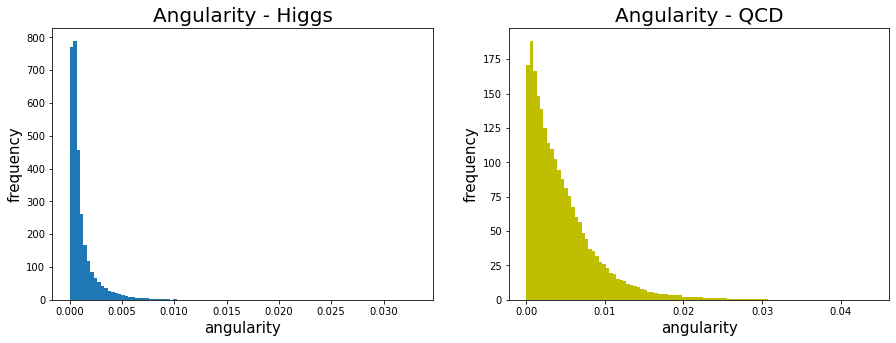

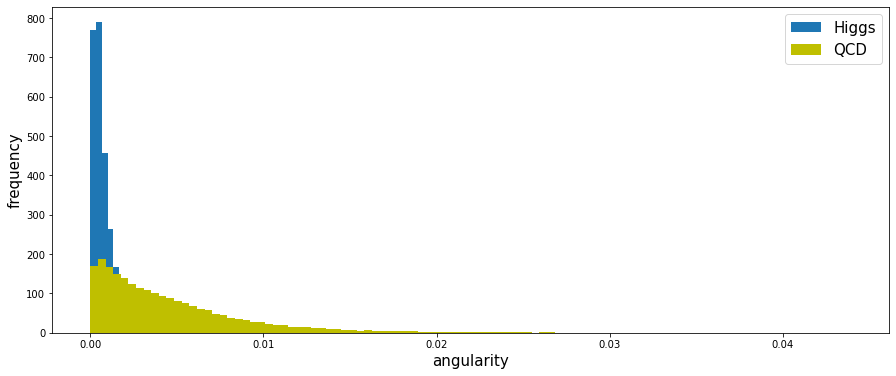

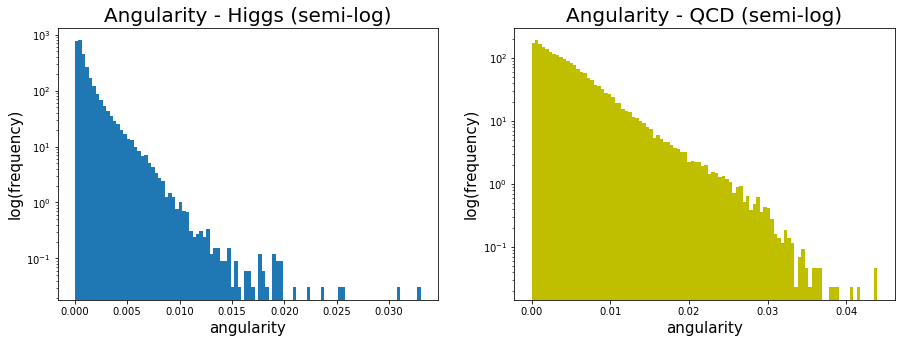

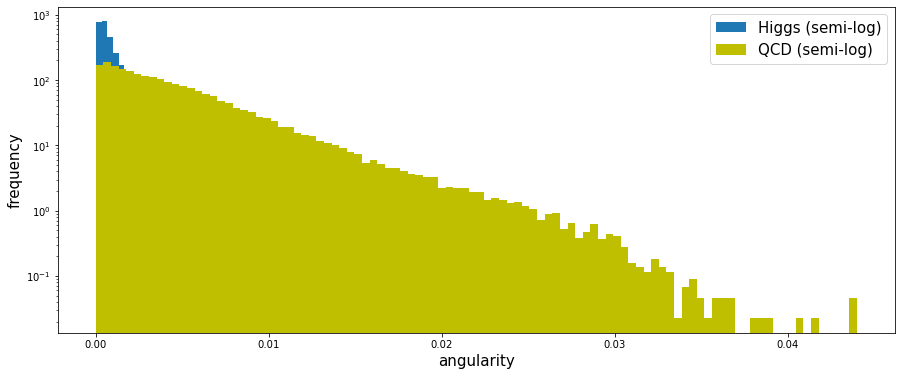

In [68]:
l1 = 'Angularity - Higgs'
l2 = 'Angularity - QCD'
l3 = 'Angularity - Higgs (semi-log)'
l4 = 'Angularity - QCD (semi-log)'
var = 'angularity'
higgs = higgs_data['angularity'][:]
qcd = qcd_data['angularity'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

### Subjettiness

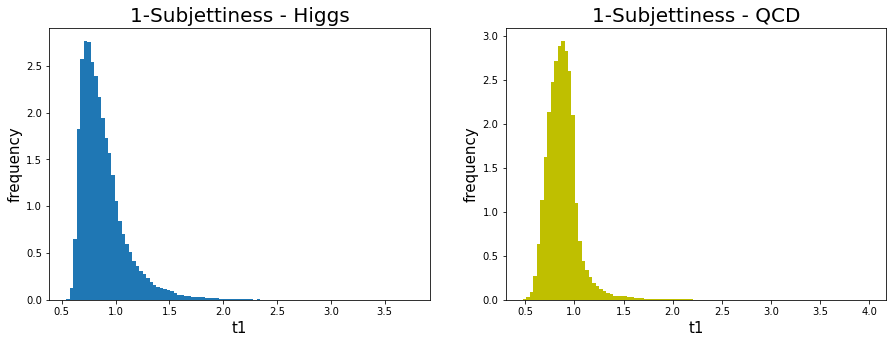

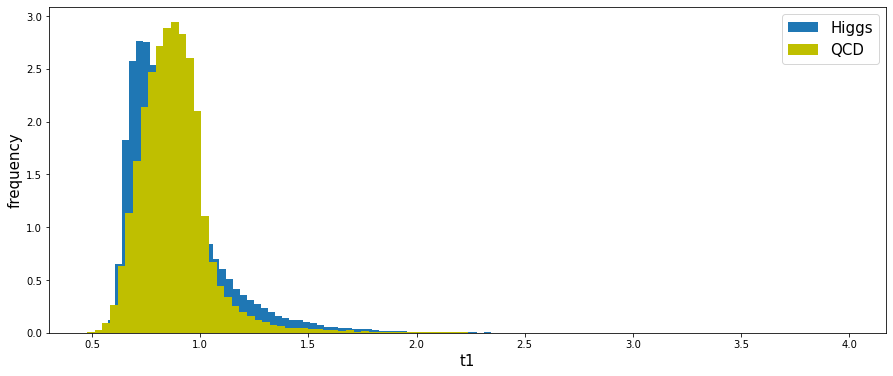

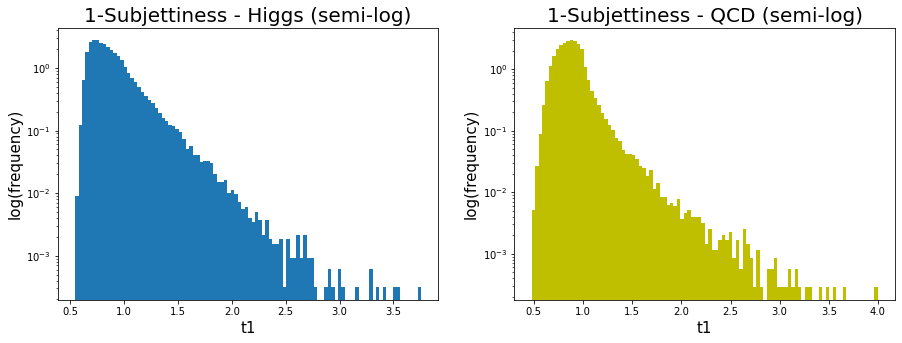

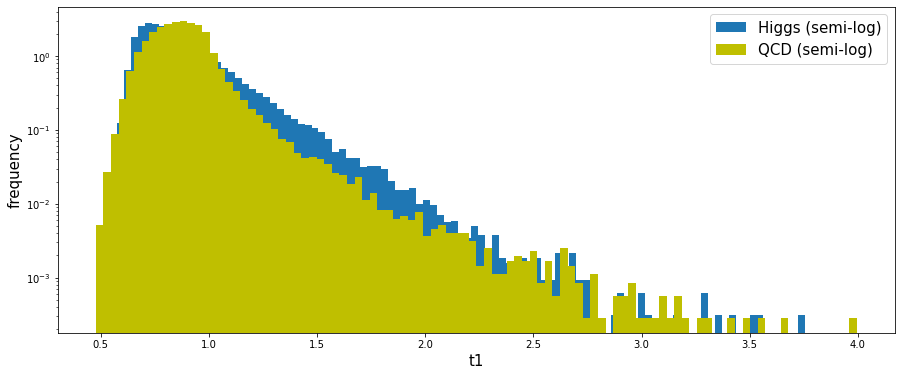

In [69]:
l1 = '1-Subjettiness - Higgs'
l2 = '1-Subjettiness - QCD'
l3 = '1-Subjettiness - Higgs (semi-log)'
l4 = '1-Subjettiness - QCD (semi-log)'
var = 't1'
higgs = higgs_data['t1'][:]
qcd = qcd_data['t1'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

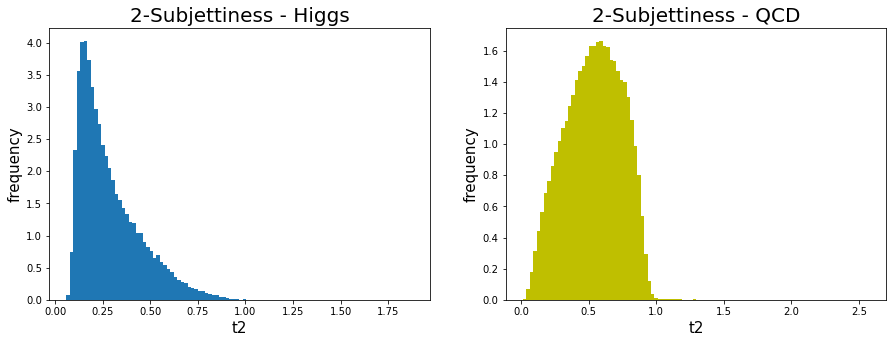

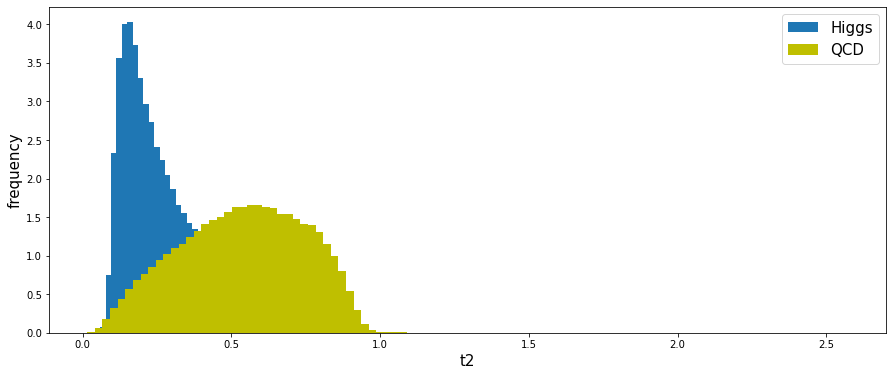

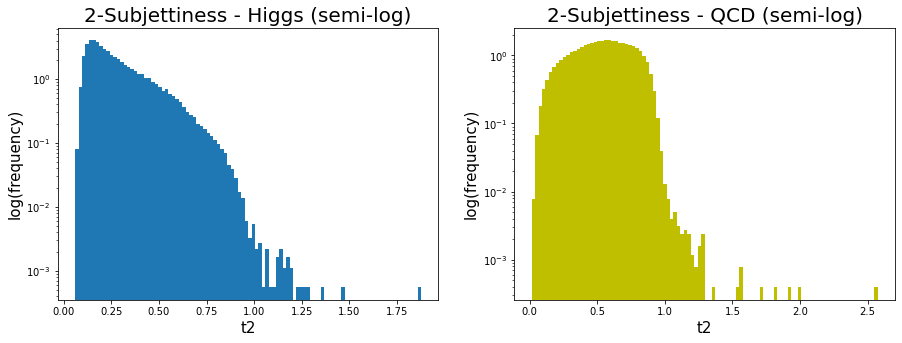

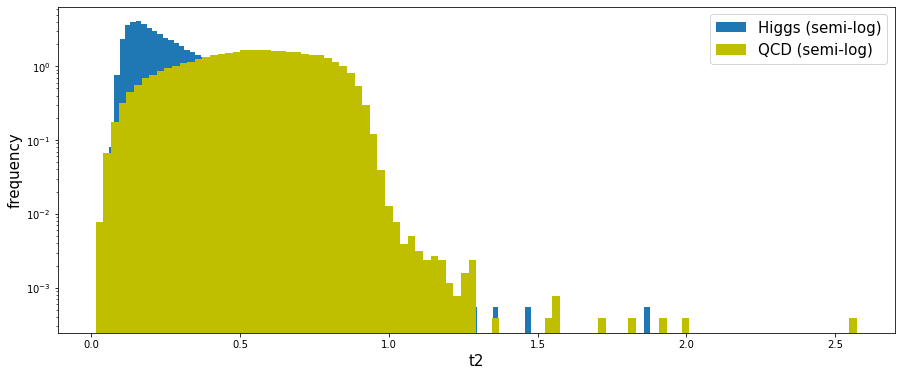

In [70]:
l1 = '2-Subjettiness - Higgs'
l2 = '2-Subjettiness - QCD'
l3 = '2-Subjettiness - Higgs (semi-log)'
l4 = '2-Subjettiness - QCD (semi-log)'
var = 't2'
higgs = higgs_data['t2'][:]
qcd = qcd_data['t2'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

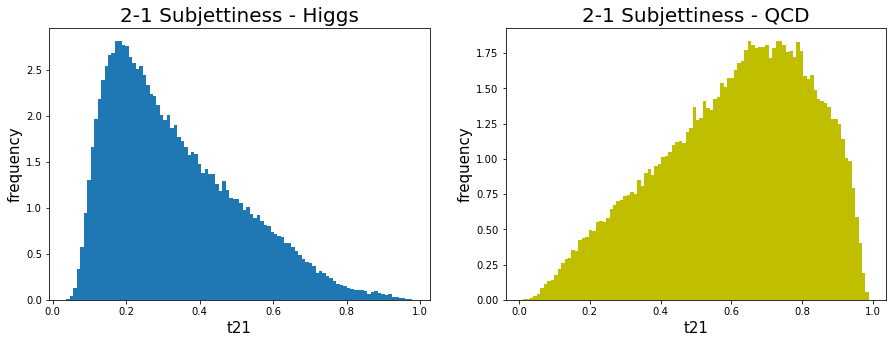

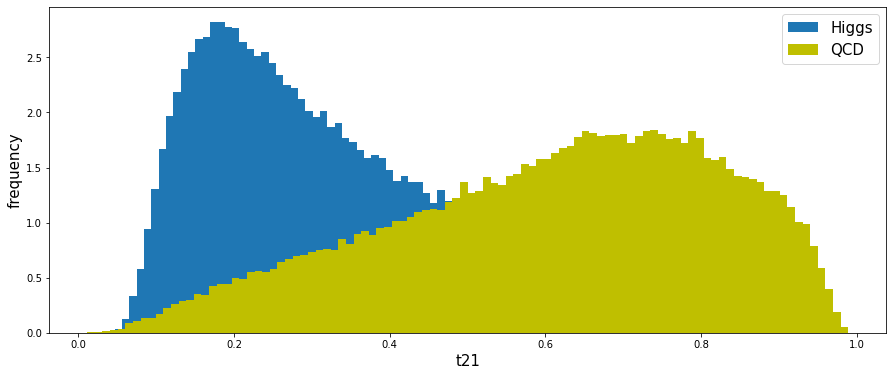

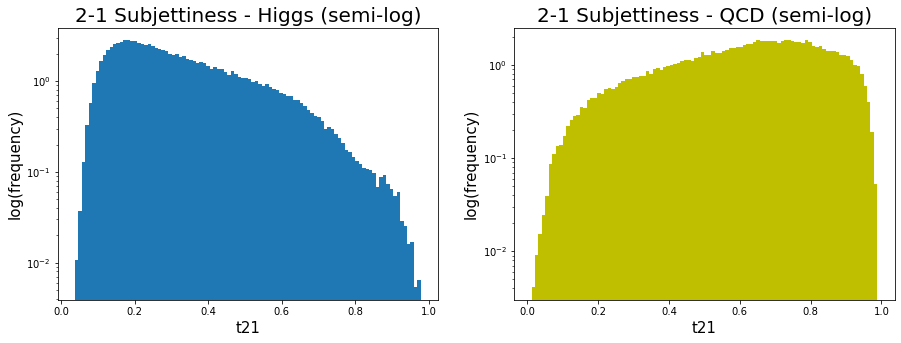

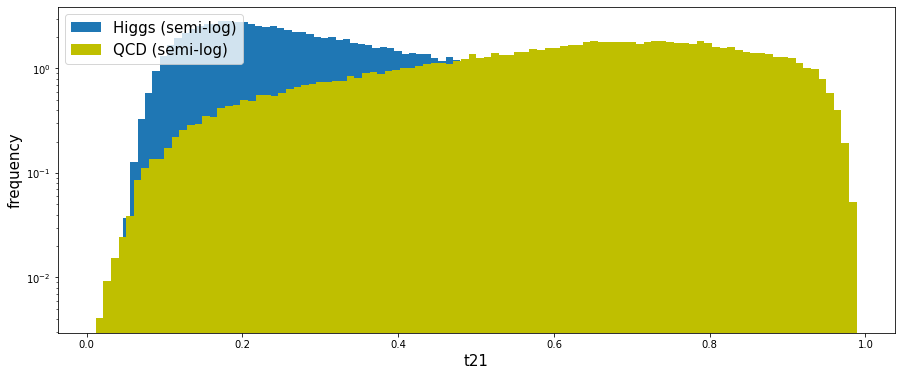

In [71]:
l1 = '2-1 Subjettiness - Higgs'
l2 = '2-1 Subjettiness - QCD'
l3 = '2-1 Subjettiness - Higgs (semi-log)'
l4 = '2-1 Subjettiness - QCD (semi-log)'
var = 't21'
higgs = higgs_data['t21'][:]
qcd = qcd_data['t21'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

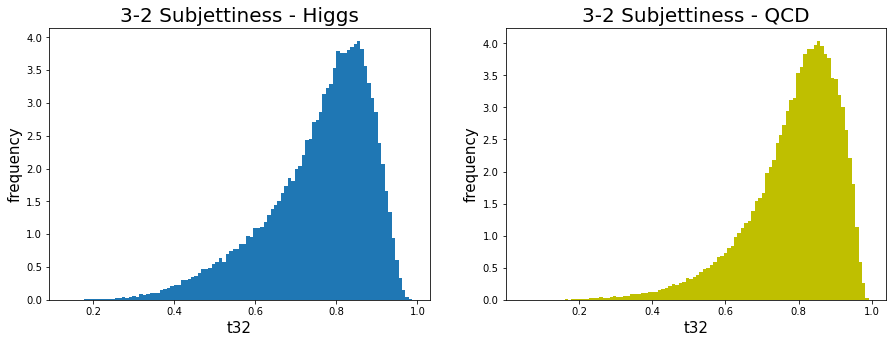

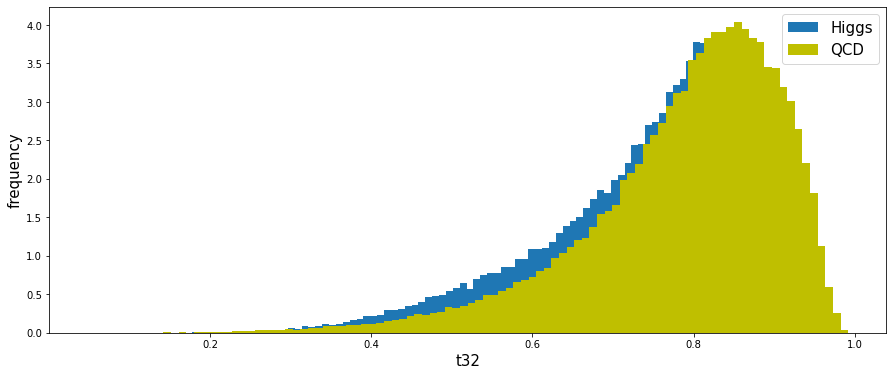

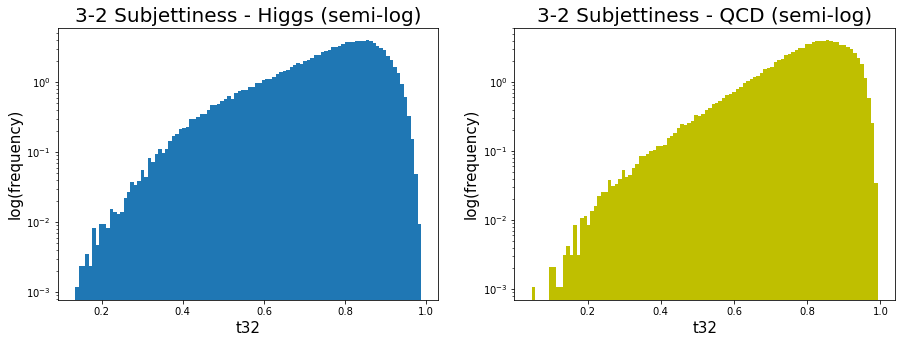

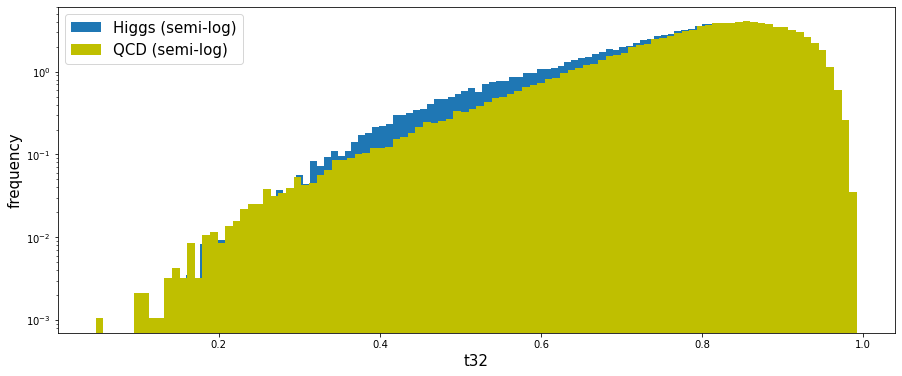

In [72]:
l1 = '3-2 Subjettiness - Higgs'
l2 = '3-2 Subjettiness - QCD'
l3 = '3-2 Subjettiness - Higgs (semi-log)'
l4 = '3-2 Subjettiness - QCD (semi-log)'
var = 't32'
higgs = higgs_data['t32'][:]
qcd = qcd_data['t32'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis

### Delta R of two subjects within large-R jet

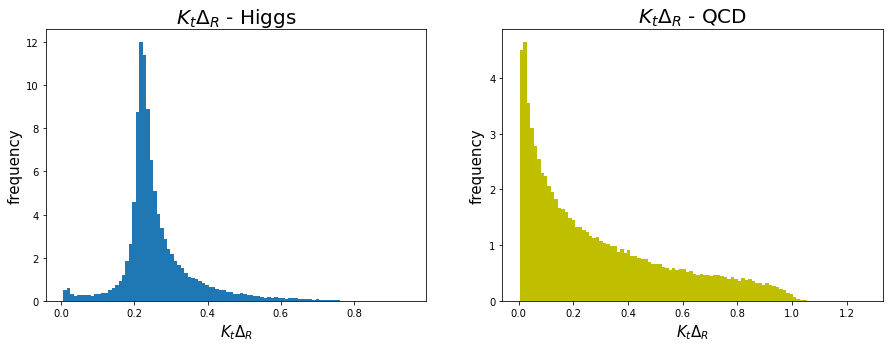

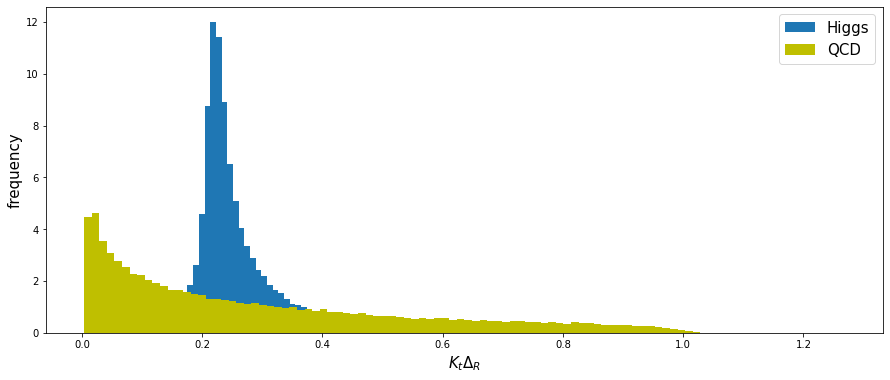

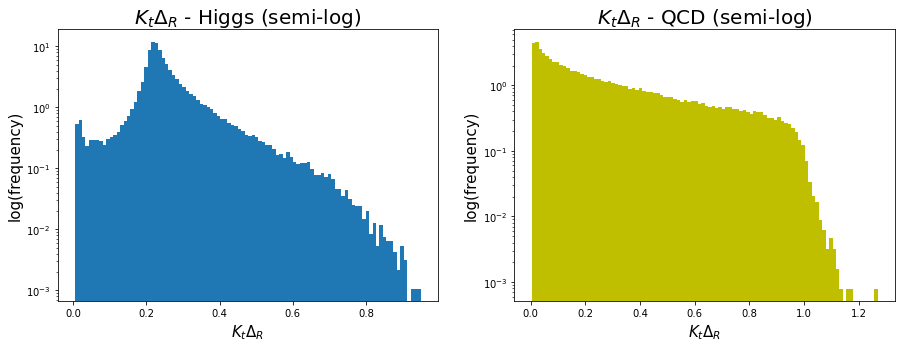

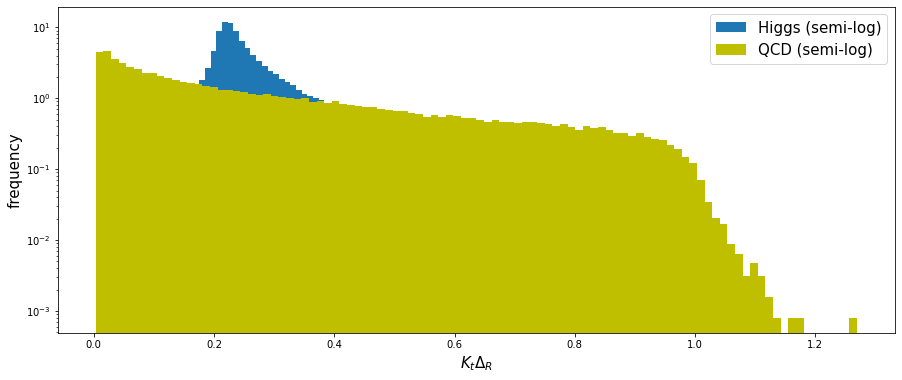

In [73]:
l1 = '$K_{t}\Delta_{R}$ - Higgs'
l2 = '$K_{t}\Delta_{R}$ - QCD'
l3 = '$K_{t}\Delta_{R}$ - Higgs (semi-log)'
l4 = '$K_{t}\Delta_{R}$ - QCD (semi-log)'
var = '$K_{t}\Delta_{R}$'
higgs = higgs_data['KtDeltaR'][:]
qcd = qcd_data['KtDeltaR'][:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_title(l1,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("frequency",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l2,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_ylabel("frequency",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.legend(fontsize=15);



fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(higgs,density=True, bins=100)
ax[0].set_yscale('log')
ax[0].set_title(l3,fontsize=20)
ax[0].set_xlabel(var,fontsize=15)
ax[0].set_ylabel("log(frequency)",fontsize=15)
ax[1].hist(qcd,density=True, bins=100,color='y')
ax[1].set_title(l4,fontsize=20)
ax[1].set_xlabel(var,fontsize=15)
ax[1].set_yscale('log')
ax[1].set_ylabel("log(frequency)",fontsize=15)
fig,ax = plt.subplots(figsize=(15,6))
ax.hist(higgs,density=True, bins=100,label="Higgs (semi-log)")
ax.hist(qcd,density=True, bins=100,color='y',label="QCD (semi-log)")
ax.set_xlabel(var,fontsize=15)
ax.set_ylabel("frequency",fontsize=15)
ax.set_yscale('log')
ax.legend(fontsize=15);

TODO: Analysis